<a href="https://colab.research.google.com/github/kay-kay-t/CodingDojo/blob/main/03_Neural_Network_Exercise(Kaggle_Competition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From [Kaggle](https://www.kaggle.com/c/restaurant-revenue-prediction/overview)

Data fields
* Id : Restaurant id. 
* Open Date : opening date for a restaurant
* City : City that the restaurant is in. Note that there are unicode in the names. 
* City Group: Type of the city. Big cities, or Other. 
* Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile
* P1, P2 - P37: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.
* Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [4]:
# Dups
df.duplicated().any()

False

In [5]:
# Missing values
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [6]:
# convert the 'Date' column to datetime format and to int 
df['Open Date']= pd.to_datetime(df['Open Date']).astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    int64  
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [7]:
# Dropping id column
df.drop(columns=['Id'], inplace=True)
df.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,932169600000000000,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1202947200000000000,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,1362787200000000000,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,1328140800000000000,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,1241827200000000000,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [8]:
# Dealing with obj City groups
df['City Group'].value_counts()

Big Cities    78
Other         59
Name: City Group, dtype: int64

In [9]:
df['City Group'] = df['City Group'].map({'Big Cities': 0, 'Other': 1})

In [10]:
# Dealing with type
df['Type'].value_counts()

FC    76
IL    60
DT     1
Name: Type, dtype: int64

In [11]:
# df['Type'] = df['Type'].map({'FC': 0, 'IL': 1, 'DT' : 2})

In [12]:
# Dealing with City col
df['City'].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Samsun             5
Bursa              5
Sakarya            4
Antalya            4
Adana              3
Tekirdağ           3
Kayseri            3
Eskişehir          3
Diyarbakır         3
Aydın              2
Konya              2
Muğla              2
Trabzon            2
Uşak               1
Edirne             1
Bolu               1
Osmaniye           1
Balıkesir          1
Amasya             1
Karabük            1
Gaziantep          1
Tokat              1
Kocaeli            1
Şanlıurfa          1
Denizli            1
Kütahya            1
Elazığ             1
Kastamonu          1
Afyonkarahisar     1
Isparta            1
Kırklareli         1
Name: City, dtype: int64

In [13]:
# Dummy encoding 
# df = pd.get_dummies(df, columns=['City', 'Type', 'City Group'], drop_first=True)
# df

In [14]:
# Assigning target and features
y = df['revenue']
X = df.drop(columns = 'revenue')

In [15]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [16]:
# Scaling data
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

#column_selectors to tell the column transformers which columns to apply which preprocessing to
category_selector = make_column_selector(dtype_include='object')
number_selector = make_column_selector(dtype_include='number')

#list of (transformer, columns) tuples
transformers = [(ohe, category_selector), (scaler, number_selector)]

#column transformer
column_transformer = make_column_transformer((ohe, category_selector), (scaler, number_selector))

#create a preprocessing pipeline to add to a later estimator pipeline
preprocessing_pipeline = make_pipeline(column_transformer)


# **Part 1: Gradient Boosting**

In [17]:
# Instantiate and fit model
gbr = GradientBoostingRegressor()
gbr_pipe = make_pipeline(preprocessing_pipeline, gbr)
gbr_pipe.fit(X_train, y_train)

print('Training accuracy:', gbr_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr_pipe.score(X_test, y_test))

Training accuracy: 0.9726971463943429
Testing accuracy: 0.12812053564219994


Gradient Boosting performing really bad on this dataset. Let's try tuning some params.

In [18]:
params = {'loss' : ['squared_error', 'ls', 'absolute_error'], 'max_depth': [2, 8, 15, 20], 'learning_rate':[0.05, 0.2, 0.3, 0.4], 'n_estimators': [20, 30, 50, 100, 150]}
gs = GridSearchCV(gbr, params, cv=3, return_train_score=True)
gs_pipe = make_pipeline(preprocessing_pipeline, gs)
gs_pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'squared_error' not supported. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'squared_error' not supported. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Loss 'squared_error' not supported. 

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('columntransformer',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories='auto',
                                                                                 drop=None,
                                                                                 dtype=<class 'numpy.float64'>,
                                                                                 handle_unknown='ignore',
                                                                          

In [19]:
# Finding best params
gs.best_params_

{'learning_rate': 0.05, 'loss': 'ls', 'max_depth': 2, 'n_estimators': 20}

In [20]:
# Trying with those params
gbr1 = GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=2, n_estimators=20)
gbr1_pipe = make_pipeline(preprocessing_pipeline, gbr1)
gbr1_pipe.fit(X_train, y_train)
print('Training accuracy:', gbr1_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr1_pipe.score(X_test, y_test))

Training accuracy: 0.36893847442008776
Testing accuracy: 0.050877905434774884


This decreased overfitting, but performance in general is really bad. 

In [21]:
# Trying with those params
gbr2 = GradientBoostingRegressor(learning_rate=0.001, loss='ls', max_depth=20, n_estimators=500)
gbr2_pipe = make_pipeline(preprocessing_pipeline, gbr2)
gbr2_pipe.fit(X_train, y_train)
print('Training accuracy:', gbr2_pipe.score(X_train, y_train))
print('Testing accuracy:', gbr2_pipe.score(X_test, y_test))

Training accuracy: 0.6323045752290363
Testing accuracy: 0.11743036322160316


In [22]:
# Checkinh RMSE
train_preds = gbr2_pipe.predict(X_train)
test_preds = gbr2_pipe.predict(X_test)
print('Testing rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('Training rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

Testing rmse: 1406987.007755711
Training rmse: 2982555.396428094


So I've tried tunning some params manually and this is the best I could get. I decreased overfitting with setting learning rate to really small one and increased testing accuracy by increasing max_depth and n_estimators.
This model is just not good for this data set I assume.

# **Part 2: Neural Network**

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
# from keras.wrappers.scikit_learn import KerasRegressor
# def create_model(input_shape = X_train.shape[1]):
#     model = Sequential()
#     # Input layer
#     model.add(Dense(19, input_dim = input_shape, activation = 'relu'))
#     # Middle layer
#     model.add(Dense(10, activation = 'relu'))
#     # Output layer for regression
#     model.add(Dense(1))

#     model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#     return model

In [25]:
# wrap the model using the function you created
# clf = KerasRegressor(build_fn=create_model,verbose=0)

# clf_pipe = make_pipeline(preprocessing_pipeline, clf)
# clf_pipe.fit(X_train, y_train)


In [26]:
# OHE
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

# Scale our data
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train_ohe)
X_test = scaler.transform(X_test_ohe)


In [27]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [28]:
# Instantiate model
model = Sequential()
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape



409

In [29]:
# Input layer
model.add(Dense(409, input_dim = input_shape, activation = 'relu'))
# Middle layer
model.add(Dense(250, activation = 'relu'))
# Middle layer
model.add(Dense(100, activation = 'relu'))
# Output layer for regression
model.add(Dense(1, activation='linear'))

In [30]:
# Compiling model for regression
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [31]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, 409) <dtype: 'float32'>
(None, 1) <dtype: 'float32'>
dense (None, 409) float32
dense_1 (None, 409) float32
dense_2 (None, 250) float32
dense_3 (None, 100) float32


[None, None, None, None]

In [32]:
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 50ms/step - loss: 24876660293632.0000 - val_loss: 30924095881216.0000
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 24876565921792.0000 - val_loss: 30923942789120.0000
Epoch 3/100
4/4 [==============================] - 0s 10ms/step - loss: 24876366692352.0000 - val_loss: 30923603050496.0000
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 24875926290432.0000 - val_loss: 30922902601728.0000
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 24875053875200.0000 - val_loss: 30921579298816.0000
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 24873506177024.0000 - val_loss: 30919264043008.0000
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 24870689701888.0000 - val_loss: 30915409477632.0000
Epoch 8/100
4/4 [==============================] - 0s 9ms/step - loss: 24866149367808.0000 - val_loss: 30909273210880.0000
Epoch 9/10

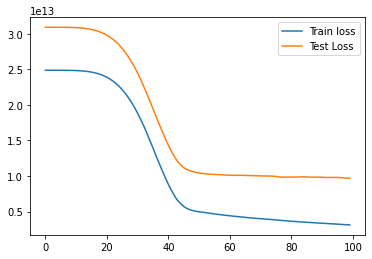

In [33]:
# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

In [34]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
print('Testing rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('Training rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

Testing rmse: 1762869.2646203549
Training rmse: 3112524.8879835736


So comparing GradientBoosting and Neural Networks, the last one did a little bit better. 

Gradient Boosting rmse:
* Testing rmse: 1406987.007755711
* Training rmse: 2981996.4384426684

Neural Networks rmse:
* Testing rmse: 1782983.5623007468
* Training rmse: 3115853.525858727


In [35]:
test_preds

array([[3607180. ],
       [4439396. ],
       [3767501.5],
       [4818212. ],
       [3650306.5],
       [3499297.8],
       [3862058. ],
       [3840552.8],
       [4668927.5],
       [4438269.5],
       [4099890.8],
       [4267534.5],
       [3676434.8],
       [5447308. ],
       [3983903.8],
       [4678097. ],
       [4788212. ],
       [4215962. ],
       [3741094.5],
       [4674723.5],
       [3630605.5],
       [3904305.5],
       [4518046. ],
       [4448620. ],
       [3448970. ],
       [4317597. ],
       [4455375. ],
       [4049311.2],
       [4439946.5],
       [3784923.8],
       [3490787.5],
       [4974109. ],
       [4367339. ],
       [3993686.5],
       [3922591. ]], dtype=float32)

In [36]:
to_submit = pd.DataFrame(test_preds, columns=['Prediction'])
to_submit.reset_index(inplace=True)
to_submit = to_submit.rename(columns = {'index':'Id'})
to_submit.head()




,Id,Prediction
0,0,3607180.0
1,1,4439396.0
2,2,3767501.5
3,3,4818212.0
4,4,3650306.5


In [37]:
to_submit.to_csv('/content/drive/MyDrive/Data/Submission.csv', index=False)

In [38]:
# Loading test data
pred = pd.read_csv('/content/drive/MyDrive/Data/test.csv')
pred.head()


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [39]:
pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [40]:
pred['City'].value_counts()

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Batman              604
Sakarya             604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Kırşehir            319
Erzincan        

In [41]:
# Dups
pred.duplicated().any()

False

In [42]:
# Missing values
pred.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [43]:
# convert the 'Date' column to datetime format and to int 
pred['Open Date']= pd.to_datetime(pred['Open Date']).astype(np.int64)
# Dropping id column
pred.drop(columns=['Id'], inplace=True)
# Dealing with City group
pred['City Group'] = pred['City Group'].map({'Big Cities': 0, 'Other': 1})
pred


,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1295654400000000000,Niğde,1,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1300406400000000000,Konya,1,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,1383091200000000000,Ankara,0,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,1367798400000000000,Kocaeli,1,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,1375228800000000000,Afyonkarahisar,1,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,947030400000000000,Antalya,1,FC,5,5.0,4.0,4.0,2,2,5,5,4,4,4,4,4.0,0,0,0,0,0,3,1,1,3,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
99996,1310947200000000000,Niğde,1,IL,1,2.0,4.0,3.0,1,1,1,5,5,5,2,4,5.0,0,0,0,1,0,1,1,1,1,2,0,0,0.0,0.0,1.0,3.0,5,0,0,0,4,0,0,0
99997,1356739200000000000,İstanbul,0,IL,4,5.0,4.0,4.0,1,2,5,3,4,5,5,4,5.0,0,4,4,3,3,3,5,4,5,5,4,4,4.0,3.0,4.0,1.0,5,5,3,2,4,4,4,2
99998,1381536000000000000,İstanbul,0,FC,12,7.5,6.0,6.0,4,4,10,10,10,10,6,10,7.5,0,0,0,0,0,20,9,3,3,15,0,2,0.0,0.0,7.5,5.0,0,0,0,4,0,0,0,0


In [44]:
# Scaling and ohe data
ohe = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

pred_df = pd.DataFrame(ohe.fit_transform(pred[['City']]).toarray())
pred_df = scaler.fit_transform(pred_df)


In [45]:
pred_df.shape

(100000, 57)

In [ ]:
preds = model.predict(pred_df)
preds

In [50]:
# # calculate predictions
# pred['Prediction'] = model.predict(X_test)
# pred['Prediction'] = pred['Prediction'].apply(lambda x: round(x,0)).astype('int')
# solution = pred_df[['Id', 'Prediction']]

In [49]:
# import os
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")
 
# # later...
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = (loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [48]:
# to_submit = pd.DataFrame({'Id': pred.index, 'Prediction': preds})
# to_submit.head()

In [47]:
# to_submit.to_csv('/content/drive/MyDrive/Data/Submission.csv', index=False)

I don't know how to apply NN model on this new test data :(  Since test data is different, it doesn't work.